# **Example 6.2.1 (Nadaraya–Watson regression model)**

This example implements the Nadaraya-Watson model for non-parametric regression. This model is a way of estimating the relationship between two variables without assuming a specific mathematical equation to describe the relationship between variables. It is particularly useful when the relationship between variables is not assumed to be linear.
The working of the Nadaraya-Watson model is as follows:
-	Consider that you have some data points with corresponding values.
-	For a new point where you want to make a prediction, the model looks at the nearby data points and gives more weight to the ones closer to the prediction point.
-	The prediction is then a weighted average of the values of those nearby points. The choice of how much weight each nearby point gets is influenced by a smoothing parameter and a kernel function.
-	The smoothing parameter controls how much influence nearby points have, and the kernel function determines how the weights are assigned.
-	This approach allows for flexibility in modeling relationships between variables without making rigid assumptions.



In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1322)


### Define a function that implements the Nadaraya-Watson kernel regression.
 It takes input variables X (training data), y (target values), query_points (points for which predictions are made), and h (bandwidth parameter).

In [ ]:
def nadaraya_watson(X, y, query_points, h):
    # Compute the Gaussian kernel weights using the Nadaraya-Watson formula
    weights = np.exp(-0.5 * ((X[:, np.newaxis] - query_points) / h) ** 2)
    # Compute the predicted y values using the weighted sum
    y_pred = np.sum(weights * y[:, np.newaxis], axis=0) / np.sum(weights, axis=0)
    # Compute the attention matrix by normalizing the weights
    attention_matrix = weights / np.sum(weights, axis=0)
    # Return the predicted y values and the attention matrix
    return y_pred, attention_matrix

### Generate synthetic data
- X represents the input features or independent variable values, which are the training data points.
- y represents the target values or dependent variable values associated with the training data points.
- query_points represent the points at which predictions will be made using the trained Nadaraya-Watson regression model.
- h is the bandwidth paarmeter that influences the width of the kernel function.

In [ ]:

# X is a sorted array of 50 random values between 0 and 10
X = np.sort(np.random.uniform(size=(50,), high=10))
# y is generated using a sinusoidal function with added random noise
y = np.sin(np.pi * 0.5 * X)  + np.random.randn(50) * 0.2
# query points are generated as a linearly spaced array from 0 to 10 with 50 points
query_points = np.linspace(0, 10, 50)
# h is the bandwidth paarmeter
h = 0.2


### Calculation of the predictions using the Nadaraya-Watson kernel regression model

The Nadaraya-Watson regression model for estimating the target variable **$\hat{y}$** is as follows:
\begin{equation}
    \hat{y}_j={\sum_{i=1}^n \alpha_{i,j}y_{i}}
\end{equation}
The estimated value of the target variable **$\hat{y}$** at a specific point *j* is given by the weighted sum of the observed response variable values $y_{i}$. The attention coefficients $\alpha_{i,j}$ represent the weights assigned to each observed data point $x_{i},y_{i}$ based on their proximity to the target point $x_{j}$. These coefficients are computed using a kernel function
*K* and a smoothing parameter *h*:
\begin{equation}
    \alpha_{i,j}=\frac{
    K(\frac{x_j-x_{i}}{h})
    }
    {
    \sum_{k=1}^n K(\frac{x_j-x_{k}}{h})
    }
\end{equation}

In [ ]:
# Compute predictions and attention matrix using the Nadaraya-Watson function
prediction, attention_matrix = nadaraya_watson(X, y, query_points, h)


### Visualize the attention matrix and the regression model

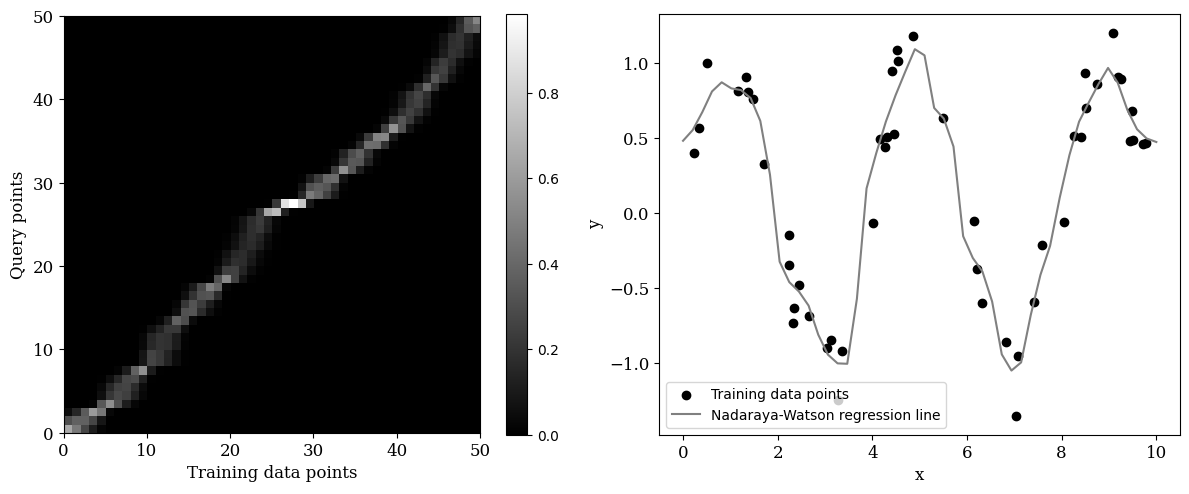

In [ ]:
# Create a Matplotlib figure which is of size 12 inches wide and 5 inches tall
plt.figure(figsize=(12, 5))
# Create a subplot with 1 row, 2 columns, and set the current axis to the first subplot
plt.subplot(121)
# Define the font family
csfont = {'fontname':'serif'}
# Plot the attention matrix as an image
plt.imshow(attention_matrix, cmap='gray', origin='lower', extent=[0, len(X), 0, len(query_points)])
# Label the x-axis, set the font size and font family
plt.xlabel('Training data points', fontsize=12, **csfont)
# Label the y-axis, set the font size and font family
plt.ylabel('Query points', fontsize=12, **csfont)
# Add a colorbar to the plot
plt.colorbar()
# Set the font size and font family of x-axis tick labels
plt.xticks(fontsize=12, **csfont)
# Set the font size and font family of y-axis tick labels
plt.yticks(fontsize=12, **csfont)

# Create a new subplot with 1 row, 2 columns, and set the current axis to the second subplot
plt.subplot(122)
# Scatter plot the training data points
plt.scatter(X, y, color='black', label='Training data points')
# Plot the Nadaraya-Watson regression line
plt.plot(query_points, prediction, color='gray', label='Nadaraya-Watson regression line')
# Label the x-axis, set the font size and font family
plt.xlabel('x', fontsize=12, **csfont)
# Label the y-axis, set the font size and font family
plt.ylabel('y', fontsize=12, **csfont)
# Set the font size and font family of x-axis tick labels
plt.xticks(fontsize=12, **csfont)
# Set the font size and font family of y-axis tick labels
plt.yticks(fontsize=12, **csfont)
# Add a legend to the plot
plt.legend()

# Save the entire plot as a PDF file
plt.savefig('NW.pdf')
# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()
# Display the plot
plt.show()


### Inferences from the attention matrix
-	The X-axis represents the training data points and the Y-axis represents the query points.
-	The color intensity at a specific intersection of the x and y axes represents the weight assigned to a particular training data point (X) when making predictions at a specific query point.
-	Lighter regions indicate higher weights, suggesting that the corresponding training data points have a stronger influence on the prediction at the corresponding query point.
-	Darker regions indicate lower weights, meaning that the corresponding training data points have less influence on the prediction at the corresponding query point.
-	Overall, the attention matrix visualizes and helps understand which training data points are more relevant when predicting these query points.
